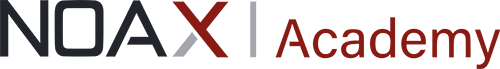

# Claves para entender los conjuntos en Python
#### **Alejandro Baldominos** 

Este cuaderno complementa al artículo del blog de NOAX Academy. [¡Léelo ahora!](https://blog.noaxacademy.com/claves-para-entender-los-conjuntos-en-python/).


## La forma mejor: funciones hash

Una forma mejor de encontrar un elemento en una colección es si sabemos dónde puede estar. Imagina que le decimos a Python: «*Python, dime si "Carla" está en mi colección*». Supongamos entonces que Python, en lugar de buscar a Carla desde el principio hasta el final, tuviera un mecanismo mágico que le permitiera saber que, si el valor `"Carla"` estuviera en nuestra colección, entonces estaría en la posición 4. Entonces, va directo a esa posición y... ¡ahí está Carla!

Pues bien, este **mecanismo mágico existe** y tiene un nombre: función hash.

Una función hash no es más que una función matemática que recibe un valor de cualquier tipo como entrada y devuelve como salida un valor numérico. Existen multitud de funciones hash, pero en este artículo no vamos a entrar en detalles sobre la implementación de estas funciones. Basta con saber que existen, y esta existencia se puede comprobar fácilmente:

In [ ]:
hash("Carla")

-2894416677657974412

_Este valor puede cambiar en diferentes sesiones de Python._

Una peculiaridad de estas funciones es que, normalmente, si la entrada cambia un poco, entonces el valor de salida cambia mucho:

In [ ]:
hash("Carlo")

3299763663277594160

_Este valor puede cambiar en diferentes sesiones de Python._

Vale, muy bonito. **¿Pero qué tiene todo esto que ver con buscar si "Carla" está en la lista de asistentes de forma rápida?** ¡Pues tiene que verlo casi todo! Sin embargo, nos queda una pieza en este asunto, y es la que ilustra el título del post.

## Los conjuntos vienen al rescate

Un conjunto tiene cierto parecido con una lista: también es una colección que permite almacenar varios elementos. En Python, es fácil inicializar un conjunto con varios elementos:

In [ ]:
conjunto = {"Hola", 1, "mundo", 1, "Hola", 2, 3, "Adiós"}

Ahora bien, los conjuntos tienen dos diferencias importantes con las listas, que son fáciles de comprobar de primera mano.

**¿Cuál es el tamaño del conjunto que acabamos de crear?** Tiene 8 elementos, ¿verdad? Igual que la lista que creamos al principio. Vamos a comprobarlo:

In [ ]:
len(conjunto)

6

Vaya, ¡pues no! Resulta que el conjunto solo tiene seis elementos. ¿Cómo puede ser? Vamos a comprobar qué pasa...

In [ ]:
conjunto

{1, 2, 3, 'Adiós', 'Hola', 'mundo'}

Ahh, ¡ya vemos lo que pasa! La primera diferencia de un conjunto con una lista es que los conjuntos no admiten elementos duplicados. Aunque intentamos añadir dos veces el número 1 y otras dos veces la cadena "Hola" al conjunto, lo cierto es que solo aparecen un vez.

Otra cosa que observamos es que los elementos no aparecen en el orden en el que los hemos declarado. ¿Puede que sea casualidad? Vamos a añadir un elemento más, a ver qué ocurre:

In [ ]:
conjunto.add("Qué tal?")
conjunto

{1, 2, 3, 'Adiós', 'Hola', 'Qué tal?', 'mundo'}

Vaya, parece que el nuevo elemento no se ha añadido al final, ¿no? Vamos a asegurarnos, comprobando cuál es el último elemento:

In [ ]:
conjunto[-1]

TypeError: ignored

**¡Catástrofe!** Resulta que Python no nos deja acceder al último elemento de un conjunto... ni al primero, ni al segundo. Esta es la segunda gran diferencia con las listas: los conjuntos no están ordenados, es decir, los elementos no ocupan una posición concreta en el conjunto.

## ¿Qué narices es un conjunto?








Si has leído hasta aquí, te habrás dado cuenta de que te he ido vendiendo los conjuntos como una especie de artefacto mágico, pero tu poca experiencia con ellos es que son más bien una especie de lista lastrada, que no permite almacenar elementos duplicados ni acceder a ellos por su posición. ¿Acaso tienen alguna ventaja estos trastos?

¡Pues sí! Pero para ello hay que entender por qué los conjuntos tienen estas extrañas limitaciones. ¡Y las funciones hash juegan un papel importante en ello! Para explicarlo, vamos a responder a la siguiente pregunta: **¿cómo almacena los datos un conjunto?**

Para entenderlo, veamos la siguiente figura:

![Almacenamiento en memoria RAM de un conjunto en Python](http://blog.noaxacademy.com/wp-content/uploads/2021/09/noax_academy_blog_baldo_collections_sets_memory.svg)
**Figura 2 |** Almacenamiento de un conjunto de Python en memoria RAM. Python reserva espacio consecutivo para alojar los punteros incluso cuando no hay elementos en el conjunto. Para determinar la posicion en la que se almacena un elemento, se calcula su función hash.

¿Qué está ocurriendo aquí realmente? El proceso es un poco más complicado que el de una lista, así que vamos a verlo con más detalle:

1.   Python reserva unas ciertas posiciones de memoria consecutivas incluso cuando el conjunto se crea vacío. A estas posiciones (o bloques) se les denomina «espacio de bloques». En versiones recientes de Python, un conjunto vacío tiene un espacio de ocho bloques (como en la Figura 2).
2.   Cuando queremos añadir un elemento al conjunto, Python emplea la función hash para obtener un número.
3.   Este número es (casi) la posición del conjunto en la que Python almacenará el valor.

Pero vamos a ver, ¿cómo que este número es la posición? ¡Si el conjunto tiene ocho bloques, y el número es -289...412! Vale, es cierto, de ahí el «casi» del paso 3. Normalmente, el resultado del hash será un número que esté fuera del rango del espacio de bloques. Pero Python, que es listo, sabe que hay una forma fácil de hacer que este número sea un valor entre 0 y 7. Basta con coger los tres últimos bits del número (tres bits son ocho posibles valores, ya que $2^3 = 8$, aquellos entre el 0 y el 7). En Python, obtener los tres últimos bits de un número es una operación que puede hacerse fácilmente aplicando lo que se conoce como una «máscara de bits». Por ejemplo, veamos que pasa con el valor `"Carla"`:


In [ ]:
hash("Carla") & 0b111

4

_Este valor puede cambiar en diferentes sesiones de Python._

¡Listo! Al aplicar la máscara de bits, obtenemos el valor 4. Entonces, Python almacenará la cadena `"Carla"` en algún lugar de la memoria RAM, y creará un puntero a esa posición en el cuarto bloque del conjunto. 

Pero **ahora viene lo interesante**. ¿Qué tenemos que hacer si queremos saber si Carla ha asistido a clase? **¡Simplemente, lo mismo!** En lugar de buscar a Carla de principio a fin, bastará con calcular su valor hash, aplicar la máscara de bits y, sabiendo que tiene que estar en la posición 4, ¡iremos directamente a esa posición para ver si está allí! 

Es decir, que en lugar de tener que buscar por toda la lista (lo que requiere un acceso a memoria por cada elemento de la lista), podemos ir directamente a la posición en la que sabemos que puede estar: **¡solo un acceso!**

---------
__Otra pequeña reflexión__

Es posible que te estés preguntando: ¿es posible que dos elementos distintos vayan a parar al mismo bloque? Eso es algo que puede ocurrir. Python tiene dos mecanismos para gestionar estos casos. 

El primero consiste en redimensionar el tamaño de bloques cuando se alcanzan 2/3 de su capacidad. En nuestro ejemplo de 8 bloques, si insertamos 5 elementos, Python multiplicará por cuatro la capacidad espacio de bloques (a 32 bloques). Este proceso se repite según el conjunto se va llenando.

El segundo mecanismo es lo que se denomina *probing*: si el valor hay que almacenarlo en un bloque que ya está ocupado, se calcula un nuevo bloque. No vamos a entrar en detalles de cómo se realiza este proceso.

---------

¡Ya sabemos cómo funcionan los conjuntos! Ahora, si tienes curiosidad (o directamente no te crees nada de lo que te he contado), vamos a poner esto en práctica y así podrás comprobarlo con tus propios ojos.

## Listas vs. conjuntos: la lucha final

Para comprobar que todo lo que hemos visto sobre listas y conjuntos no es un *invent*, vamos a hacer dos cosas: medir memoria y medir tiempo.

Para medir memoria emplearemos la función `sys.getsizeof()`, que nos proporciona la memoria ocupada por un objeto en Python. Por ejemplo:

In [ ]:
import sys
l = list()
s = set()
print(f"El tamaño de una lista vacía es de {sys.getsizeof(l)} bytes.")
print(f"El tamaño de un conjunto vacío es de {sys.getsizeof(s)} bytes.")

El tamaño de una lista vacía es de 72 bytes.
El tamaño de un conjunto vacío es de 232 bytes.


Aunque estos valores pueden depender según la versión de Python e incluso el ordenador en el que se ejecute, se observa claramente que el conjunto ocupa más tamaño, incluso estando vacío. ¡Esto se debe a que el conjunto tiene ya un espacio de bloques pre-reservado!

A continuación, vamos a usar  `%%timeit` para medir el tiempo que lleva insertar 1 millón de elementos en ambas colecciones. Los elementos que vamos a introducir son los números del 1 a 1.000.000. Comencemos con la lista:

In [ ]:
%%timeit 
l = list()
for i in range(10000000):
  l.append(i+1)

1 loop, best of 5: 1.42 s per loop


Observamos que insertar 10 millones de elementos en la lista tarda unos 1,42 segundos. ¿Qué ocurrirá con un conjunto? Vamos a verlo:



In [ ]:
%%timeit 
s = set()
for i in range(10000000):
  s.add(i+1)

1 loop, best of 5: 1.51 s per loop


¡Casi lo mismo! En realidad, la inserción en el conjunto es un poco más lenta, porque se debe realizar el cálculo de la función hash. Sin embargo, puede observarse que no existen grandes diferencias.

¿Cuánto ocupará ahora cada objeto en memoria? Vamos a verlo:

In [ ]:
l = list([i + 1 for i in range(10000000)])
s = set(l)
size_l = sys.getsizeof(l) / 1024 / 1024
size_s = sys.getsizeof(s) / 1024 / 1024
print(f"El tamaño de la lista es de {size_l:.2f} MB.")
print(f"El tamaño del conjunto es de {size_s:.2f} MB.")

El tamaño de la lista es de 85.83 MB.
El tamaño del conjunto es de 256.00 MB.


Podemos observar como el conjunto ocupa mucho más que la lista, **¡justo como esperábamos!** Al final, el conjunto tiene reservado un espacio de bloques mucho mayor, a pesar de que muchos de esos bloques estarán vacíos. Ahora bien, vamos a ver qué ocurre cuando buscamos si un elemento está en la lista:

In [ ]:
%%timeit
1 in l

The slowest run took 35.07 times longer than the fastest. This could mean that an intermediate result is being cached.
10000000 loops, best of 5: 48.6 ns per loop


Ahora, haremos lo mismo para nuestro conjunto:



In [ ]:
%%timeit
1 in s

The slowest run took 56.86 times longer than the fastest. This could mean that an intermediate result is being cached.
10000000 loops, best of 5: 52 ns per loop


***¡Pero qué estafa es esta!*** Habíamos prometido que la búsqueda en el conjunto sería más rápida y, sin embargo, no lo es. De hecho, ¡es un poco más lenta!

Antes de desesperarte y pensar que todo este artículo solo ha sido una pérdida de tiempo, veamos que pasa si buscamos otro valor. Por ejemplo, uno que no está en nuestras colecciones:

In [ ]:
%%timeit
0 in l

10 loops, best of 5: 137 ms per loop


In [ ]:
%%timeit
0 in s

The slowest run took 47.53 times longer than the fastest. This could mean that an intermediate result is being cached.
10000000 loops, best of 5: 50.9 ns per loop


**¡Ahora sí!** En esta ocasión, la búsqueda en el conjunto ha tardado apenas 50,9 nanosegundos (prácticamente lo mismo que la búsqueda anterior). Sin embargo, en el caso de la lista, ha tardado 137 milisegundos. Puede que nos parezca que ambas búsquedas han sido muy rápidas, pero si echamos cuentas la búsqueda en la lista es... **¡más de 2,5 millones de veces más lenta!** No, no es un error de cálculo:

$$ \frac{137\,ms}{50.9\,ns} = \frac{137 \cdot 10^{-3}}{50.9 \cdot 10^{-9}} = 2,691,552 $$

Pero, ***¿qué es lo que ha pasado?***

## Lo que ha pasado

Lo que ha pasado ya lo hemos anticipado a lo largo del artículo, pero vamos a reflexionar un poco sobre ello. La búsqueda en una lista depende de dos cosas:

+ si el elemento a buscar está en la lista o no y,
+ si está, la posición que ocupa en la lista.

Cuando hemos buscado el número 1, lo hemos encontrado muy rápidamente... ¡porque es el primer elemento de la lista! Si hubiéramos buscado un número mayor (el 10, el 100, el 1000000) veríamos que la búsqueda se demora más tiempo, porque Python debe recorrer la lista desde el principio hasta encontrar el elemento. En el peor caso, si el elemento no está en la lista, ¡Python debe recorrerla entera! Por eso el proceso de buscar el número 0 fue tan lento.

En términos matemáticos diríamos que «la búsqueda en la lista tiene complejidad computacional $\mathcal{O}(n)$, siendo $n$ el tamaño de la lista (en este caso, $n = 10,000,000$). Es otra forma de decir que el tiempo de ejecución del algoritmo requiere en el peor caso un número de operaciones (por ejemplo, accesos a memoria), que depende de $n$.

Sin embargo, en el caso de un conjunto, ¡esto no es así! En el conjunto, solo tenemos que calcular el valor hash y a continuación buscar en el bloque correspondiente. Si el valor buscado está, perfecto. Si no está, pues no está, y punto. No hay que seguir buscando. Formalmente se dice que «la búsqueda en el conjunto tiene complejidad computacional $\mathcal{O}(1)$, para indicar que el tiempo es constante, no depende del tamaño del conjunto.

## Conclusiones

En este artículo hemos visto dos colecciones en Python: las listas y los conjuntos. Las listas son el tipo de colección más usado, y son realmente versátiles. Los conjuntos son menos conocidos y tienen algunas limitaciones comparados con las listas. Sin embargo, son muy útiles cuando queremos realizar búsquedas eficientes en la colección.

¿Todavía tienes dudas de cuándo usar una lista y cuándo es mejor emplear un conjunto? El siguiente diagrama puede ayudarte:

![Diagrama de flujo para decidir si es más adecuado emplear una lista o un conjunto.](http://blog.noaxacademy.com/wp-content/uploads/2021/09/noax_academy_blog_baldo_collections_lists_decision.svg)
**Figura 3 |** Diagrama de flujo para decidir si debemos usar una lista o un conjunto. La lista es la elección obligada cuando nos importa la posición de nuestros elementos (es decir, hay un orden), cuando deba ser posible almacenar valores duplicados, y cuando la memoria ocupada sea un aspecto crítico. Además, deberemos usar una lista si el tipo de nuestros elementos no es hasheable, es decir, no se puede calcular una función hash sobre ellos. En la práctica, los tipos habituales (números, booleanos, cadenas de texto, etc.) son hasheables. Si cumplimos las condiciones anteriores y vamos a realizar búsquedas en nuestra colección, el conjunto es la mejor opción.

Espero que este artículo te haya ayudado a entender las diferencias entre estas dos colecciones, y ahora sepas cuál es la más adecuada para ti según tus necesidades. ¡Tus programas nunca habían sido tan rápidos!

#### Aprende más:
+  Más información sobre la implementación de las listas en Python (en inglés): http://www.laurentluce.com/posts/python-list-implementation/
+  Más información sobre funciones hash y conjuntos en Python (en inglés): https://www.oreilly.com/library/view/high-performance-python/9781449361747/ch04.html

In [ ]:
#@title Acerca del autor
%%html

<img src="http://blog.noaxacademy.com/wp-content/uploads/2021/06/avatar_user_2_1624228090-130x130.png" alt="Alejandro Baldominos"
 style="float:left; width=10%; margin-right: 1em;">
<div style="width:30%">
<h2>Alejandro Baldominos</h2>
<p>Doctor en Ciencia y Tecnología Informática por la Universidad Carlos III de Madrid. Docente, investigador, y colaborador con varias empresas tecnológicas. Me apasiona la ciencia de datos, el machine learning y la inteligencia artificial. También disfruto enseñando programación «bien», es decir, explicando cómo tomar las mejores decisiones para que nuestros programas sean lo mejor posible.</p>
</div>

 © 2021 NOAX Academy. Todos los derechos reservados. 